In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mplsoccer import Pitch
import numpy as np
import os
import pandas as pd
pd.set_option('display.max_columns', None)  # 모든 열 출력
import polars as pl
import sys
from unravel.soccer import KloppyPolarsDataset
from kloppy import sportec
coordinates = "secondspectrum"
root_path = os.path.abspath("..")
sys.path.append(root_path)

2025-06-14 05:30:56.043188: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-14 05:30:56.045482: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-14 05:30:56.074106: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-14 05:30:56.074137: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-14 05:30:56.074157: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

# Kloppy

In [31]:
match_id = "J03WMX"
kloppy_dataset = sportec.load_open_tracking_data(
    match_id=match_id, coordinates=coordinates
)

In [32]:
kloppy_df = kloppy_dataset.to_df()
kloppy_df.head()

,period_id,timestamp,frame_id,ball_state,ball_owning_team_id,ball_x,ball_y,ball_z,ball_speed,DFL-OBJ-0002DR_x,DFL-OBJ-0002DR_y,DFL-OBJ-0002DR_d,DFL-OBJ-0002DR_s,DFL-OBJ-0000IA_x,DFL-OBJ-0000IA_y,DFL-OBJ-0000IA_d,DFL-OBJ-0000IA_s,DFL-OBJ-0027G6_x,DFL-OBJ-0027G6_y,DFL-OBJ-0027G6_d,DFL-OBJ-0027G6_s,DFL-OBJ-0002F5_x,DFL-OBJ-0002F5_y,DFL-OBJ-0002F5_d,DFL-OBJ-0002F5_s,DFL-OBJ-0026PM_x,DFL-OBJ-0026PM_y,DFL-OBJ-0026PM_d,DFL-OBJ-0026PM_s,DFL-OBJ-0002AU_x,DFL-OBJ-0002AU_y,DFL-OBJ-0002AU_d,DFL-OBJ-0002AU_s,DFL-OBJ-0027KL_x,DFL-OBJ-0027KL_y,DFL-OBJ-0027KL_d,DFL-OBJ-0027KL_s,DFL-OBJ-0027G0_x,DFL-OBJ-0027G0_y,DFL-OBJ-0027G0_d,DFL-OBJ-0027G0_s,DFL-OBJ-J017RE_x,DFL-OBJ-J017RE_y,DFL-OBJ-J017RE_d,DFL-OBJ-J017RE_s,DFL-OBJ-J01APO_x,DFL-OBJ-J01APO_y,DFL-OBJ-J01APO_d,DFL-OBJ-J01APO_s,DFL-OBJ-J01B8N_x,DFL-OBJ-J01B8N_y,DFL-OBJ-J01B8N_d,DFL-OBJ-J01B8N_s,DFL-OBJ-0027AX_x,DFL-OBJ-0027AX_y,DFL-OBJ-0027AX_d,DFL-OBJ-0027AX_s,DFL-OBJ-00012X_x,DFL-OBJ-00012X_y,DFL-OBJ-00012X_d,DFL-OBJ-00012X_s,DFL-OBJ-000270_x,DFL-OBJ-000270_y,DFL-OBJ-000270_d,DFL-OBJ-000270_s,DFL-OBJ-0002HE_x,DFL-OBJ-0002HE_y,DFL-OBJ-0002HE_d,DFL-OBJ-0002HE_s,DFL-OBJ-0002BO_x,DFL-OBJ-0002BO_y,DFL-OBJ-0002BO_d,DFL-OBJ-0002BO_s,DFL-OBJ-0027B6_x,DFL-OBJ-0027B6_y,DFL-OBJ-0027B6_d,DFL-OBJ-0027B6_s,DFL-OBJ-0028BD_x,DFL-OBJ-0028BD_y,DFL-OBJ-0028BD_d,DFL-OBJ-0028BD_s,DFL-OBJ-002G4A_x,DFL-OBJ-002G4A_y,DFL-OBJ-002G4A_d,DFL-OBJ-002G4A_s,DFL-OBJ-J01BGM_x,DFL-OBJ-J01BGM_y,DFL-OBJ-J01BGM_d,DFL-OBJ-J01BGM_s,DFL-OBJ-J01D1W_x,DFL-OBJ-J01D1W_y,DFL-OBJ-J01D1W_d,DFL-OBJ-J01D1W_s,DFL-OBJ-002GKO_x,DFL-OBJ-002GKO_y,DFL-OBJ-002GKO_d,DFL-OBJ-002GKO_s,DFL-OBJ-J015S4_x,DFL-OBJ-J015S4_y,DFL-OBJ-J015S4_d,DFL-OBJ-J015S4_s,DFL-OBJ-0027V2_x,DFL-OBJ-0027V2_y,DFL-OBJ-0027V2_d,DFL-OBJ-0027V2_s,DFL-OBJ-002G89_x,DFL-OBJ-002G89_y,DFL-OBJ-002G89_d,DFL-OBJ-002G89_s,DFL-OBJ-J01DVC_x,DFL-OBJ-J01DVC_y,DFL-OBJ-J01DVC_d,DFL-OBJ-J01DVC_s,DFL-OBJ-0000RP_x,DFL-OBJ-0000RP_y,DFL-OBJ-0000RP_d,DFL-OBJ-0000RP_s,DFL-OBJ-000191_x,DFL-OBJ-000191_y,DFL-OBJ-000191_d,DFL-OBJ-000191_s,DFL-OBJ-0026ZI_x,DFL-OBJ-0026ZI_y,DFL-OBJ-0026ZI_d,DFL-OBJ-0026ZI_s,DFL-OBJ-002GBW_x,DFL-OBJ-002GBW_y,DFL-OBJ-002GBW_d,DFL-OBJ-002GBW_s,DFL-OBJ-002GCR_x,DFL-OBJ-002GCR_y,DFL-OBJ-002GCR_d,DFL-OBJ-002GCR_s,DFL-OBJ-J01N65_x,DFL-OBJ-J01N65_y,DFL-OBJ-J01N65_d,DFL-OBJ-J01N65_s
0,1,0 days 00:00:00,10000,alive,DFL-CLU-00000G,0.18,-0.17,0.00,1.98,-46.73,0.18,None,0.00,-1.53,12.68,None,0.00,0.78,-0.54,None,0.00,-9.09,-1.96,None,0.00,0.42,33.22,None,0.00,0.11,-21.87,None,0.00,-16.05,1.04,None,0.00,-12.80,-18.85,None,0.00,-20.77,9.07,None,0.00,-13.80,25.72,None,0.00,0.52,10.26,None,0.00,6.90,5.12,None,0.00,13.08,-13.71,None,0.00,-2.12,-7.09,None,0.00,47.37,0.25,None,0.00,17.26,20.85,None,0.00,20.16,7.08,None,0.00,0.44,-15.57,None,0.00,10.39,-3.39,None,0.00,1.40,13.05,None,0.00,18.84,-4.49,None,0.00,11.37,5.18,None,0.00,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN
1,1,0 days 00:00:00.040000,10001,alive,DFL-CLU-00000G,-0.40,-0.19,0.00,2.02,-46.71,0.18,None,2.21,-1.45,12.68,None,11.34,0.85,-0.56,None,7.74,-9.06,-1.95,None,3.10,0.59,33.18,None,12.60,0.08,-21.87,None,1.73,-15.98,0.99,None,7.27,-12.83,-18.86,None,3.04,-20.77,9.11,None,3.10,-13.78,25.74,None,2.59,0.63,10.23,None,9.83,6.82,5.10,None,8.94,13.06,-13.75,None,3.49,-2.28,-6.99,None,17.45,47.34,0.26,None,3.56,17.23,20.88,None,4.43,20.12,7.09,None,2.98,0.37,-15.57,None,6.91,10.28,-3.39,None,10.72,1.39,13.05,None,0.70,18.79,-4.49,None,4.08,11.34,5.23,None,4.77,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN
2,1,0 days 00:00:00.080000,10002,alive,DFL-CLU-00000G,-0.97,-0.21,0.01,2.02,-46.68,0.18,None,2.35,-1.27,12.65,None,12.80,0.94,-0.59,None,8.08,-9.02,-1.94,None,3.17,0.77,33.14,None,13.55,0.04,-21.86,None,2.03,-15.92,0.94,None,7.32,-12.88,-18.86,None,3.17,-20.77,9.14,None,3.40,-13.75,25

In [33]:
home_team, away_team = kloppy_dataset.metadata.teams
home_team.players[9]

Player(player_id='DFL-OBJ-0028BD', team=Team(team_id='DFL-CLU-000008', name='1. FC Köln', ground=home, starting_formation=None, formations=<TimeContainer>, players=[Player(player_id='DFL-OBJ-0027AX', team=..., jersey_no=11, name='F. Kainz', first_name='Florian', last_name='Kainz', starting=True, starting_position=<PositionType.CenterAttackingMidfield: ('Center Attacking Midfield', 'CAM', 'AttackingMidfield')>, positions=TimeContainer[PositionType]({'P1T00:00': <PositionType.CenterAttackingMidfield: ('Center Attacking Midfield', 'CAM', 'AttackingMidfield')>}), attributes={}), Player(player_id='DFL-OBJ-0000M0', team=..., jersey_no=1, name='Timo Horn', first_name='Timo Phil', last_name='Horn', starting=False, starting_position=<PositionType.Unknown: ('Unknown', 'UNK', None)>, positions=<TimeContainer>, attributes={}), Player(player_id='DFL-OBJ-00012X', team=..., jersey_no=14, name='Jonas Hector', first_name='Jonas Armin', last_name='Hector', starting=True, starting_position=<PositionType.

In [34]:
dataset = KloppyPolarsDataset(kloppy_dataset=kloppy_dataset, orient_ball_owning=False)
dataset.data.head()

period_id,timestamp,frame_id,ball_state,id,x,y,z,team_id,position_name,game_id,vx,vy,vz,v,ax,ay,az,a,ball_owning_team_id,is_ball_carrier
i64,duration[μs],i64,str,str,f64,f64,f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,bool
1,0µs,10000,"""alive""","""DFL-OBJ-0000IA""",1.53,-12.68,0.0,"""DFL-CLU-00000G""","""CAM""","""DFL-MAT-J03WMX""",-1.491071,0.151786,0.0,1.498777,0.0,0.0,0.0,0.0,"""DFL-CLU-00000G""",false
1,40ms,10001,"""alive""","""DFL-OBJ-0000IA""",1.45,-12.68,0.0,"""DFL-CLU-00000G""","""CAM""","""DFL-MAT-J03WMX""",-2.232143,0.232143,0.0,2.244182,-18.526786,2.008929,0.0,6.0,"""DFL-CLU-00000G""",false
1,80ms,10002,"""alive""","""DFL-OBJ-0000IA""",1.27,-12.65,0.0,"""DFL-CLU-00000G""","""CAM""","""DFL-MAT-J03WMX""",-2.973214,0.3125,0.0,2.989592,-18.526786,2.008929,0.0,6.0,"""DFL-CLU-00000G""",false
1,120ms,10003,"""alive""","""DFL-OBJ-0000IA""",1.07,-12.64,0.0,"""DFL-CLU-00000G""","""CAM""","""DFL-MAT-J03WMX""",-3.714286,0.392857,0.0,3.735004,-18.526786,2.008929,0.0,6.0,"""DFL-CLU-00000G""",false
1,160ms,10004,"""alive""","""DFL-OBJ-0000IA""",0.88,-12.61,0.0,"""DFL-CLU-00000G""","""CAM""","""DFL-MAT-J03WMX""",-4.392857,0.5,0.0,4.421221,-16.964286,2.678571,0.0,6.0,"""DFL-CLU-00000G""",false


In [35]:
dataset_df = dataset.data.to_pandas()
# agent_id = 'ball'
# dataset_df[(dataset_df['id']==agent_id) & (dataset_df['period_id']==1)].head()
dataset_df.head()

,period_id,timestamp,frame_id,ball_state,id,x,y,z,team_id,position_name,game_id,vx,vy,vz,v,ax,ay,az,a,ball_owning_team_id,is_ball_carrier
0,1,0 days 00:00:00,10000,alive,DFL-OBJ-0000IA,1.53,-12.68,0.0,DFL-CLU-00000G,CAM,DFL-MAT-J03WMX,-1.491071,0.151786,0.0,1.498777,0.000000,0.000000,0.0,0.0,DFL-CLU-00000G,False
1,1,0 days 00:00:00.040000,10001,alive,DFL-OBJ-0000IA,1.45,-12.68,0.0,DFL-CLU-00000G,CAM,DFL-MAT-J03WMX,-2.232143,0.232143,0.0,2.244182,-18.526786,2.008929,0.0,6.0,DFL-CLU-00000G,False
2,1,0 days 00:00:00.080000,10002,alive,DFL-OBJ-0000IA,1.27,-12.65,0.0,DFL-CLU-00000G,CAM,DFL-MAT-J03WMX,-2.973214,0.312500,0.0,2.989592,-18.526786,2.008929,0.0,6.0,DFL-CLU-00000G,False
3,1,0 days 00:00:00.120000,10003,alive,DFL-OBJ-0000IA,1.07,-12.64,0.0,DFL-CLU-00000G,CAM,DFL-MAT-J03WMX,-3.714286,0.392857,0.0,3.735004,-18.526786,2.008929,0.0,6.0,DFL-CLU-00000G,False
4,1,0 days 00:00:00.160000,10004,alive,DFL-OBJ-0000IA,0.88,-12.61,0.0,DFL-CLU-00000G,CAM,DFL-MAT-J03WMX,-4.392857,0.500000,0.0,4.421221,-16.964286,2.678571,0.0,6.0,DFL-CLU-00000G,False


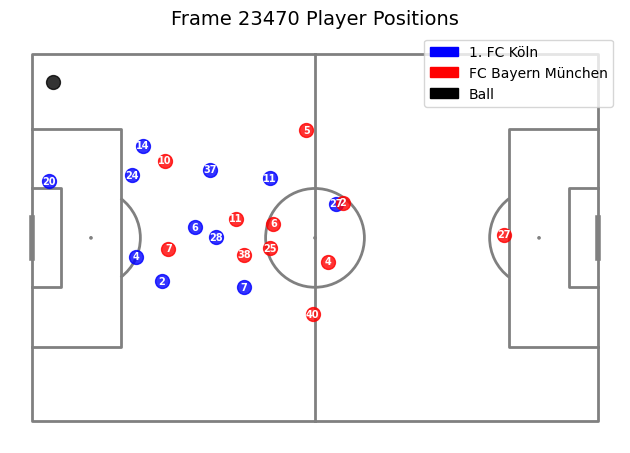

In [36]:
def plot_single_frame_positions(total_df, period_id, frame_idx, pitch, home_team_info, away_team_info):
    """
    Plots all x/y positions for a single frame and annotates each player with their jersey number.
    The legend shows team names.
    
    Parameters:
        df (DataFrame): Positional data (Pandas or Polars converted to Pandas if needed)
        frame_idx (int): The target frame index.
        pitch: An mplsoccer Pitch object.
        home_team_info: Team object for the home team.
        away_team_info: Team object for the away team.
    """
    # 기본 팀 색상
    team_colors = {"Home": "blue", "Away": "red", "Ball": "black"}

    df = total_df[(total_df['period_id']==period_id) & (total_df['frame_id']==frame_idx)]
    # x/y 컬럼 검출 (컬럼 이름은 "pid_x" 또는 "pid_y" 형태)
    player_ids = df['id'].unique()
    
    # 팀 정보 딕셔너리 생성: key=player_id, value=[player.name, player.jersey_no]
    home_team_dict = {player.player_id: [player.name, player.jersey_no] for player in home_team_info.players}
    away_team_dict = {player.player_id: [player.name, player.jersey_no] for player in away_team_info.players}
    
    # 피치 그리기
    fig, ax = pitch.draw()
    ax.set_title(f"Frame {frame_idx} Player Positions", fontsize=14)
    
    # 각 선수 위치 플로팅 및 등번호 표시
    for pid in player_ids:
        x = df[df['id']==pid]["x"].iloc[0]
        y = df[df['id']==pid]["y"].iloc[0]
        if pd.isna(x) or pd.isna(y):
            continue  # 결측치 스킵
        
        if pid in home_team_dict:
            color = team_colors["Home"]
            jersey_no = home_team_dict[pid][1]
        elif pid in away_team_dict:
            color = team_colors["Away"]
            jersey_no = away_team_dict[pid][1]
        elif "ball" in pid.lower():
            color = team_colors["Ball"]
            jersey_no = ""  # 공은 등번호가 없으므로 빈 문자열
        else:
            color = "gray"
            jersey_no = ""
        
        # 선수 위치 scatter plot
        ax.scatter(x, y, color=color, s=100, alpha=0.8)
        # 선수 등번호 텍스트 추가 (중앙 정렬, 흰색 텍스트)
        if jersey_no != "":
            ax.text(x, y, str(jersey_no), fontsize=7, fontweight="bold", color="white",
                    ha="center", va="center")
    
    # 범례 생성: 홈팀, 어웨이팀, 볼 (필요한 경우)
    home_patch = mpatches.Patch(color=team_colors["Home"], label=home_team_info.name)
    away_patch = mpatches.Patch(color=team_colors["Away"], label=away_team_info.name)
    ball_patch = mpatches.Patch(color=team_colors["Ball"], label="Ball")
    ax.legend(handles=[home_patch, away_patch, ball_patch], loc='upper right')
    
    plt.show()

# Set up pitch using kloppy_dataset metadata (예시)
pitch = Pitch(
    pitch_type='secondspectrum', 
    pitch_length=kloppy_dataset.metadata.pitch_dimensions.pitch_length,
    pitch_width=kloppy_dataset.metadata.pitch_dimensions.pitch_width,
    pitch_color='white', 
    line_color='gray'
)

# 호출 예시 (home_team와 away_team 객체가 미리 정의되어 있다고 가정)
dataset_df = dataset.data.to_pandas()
plot_single_frame_positions(dataset_df, period_id=1,frame_idx=23470, pitch=pitch, home_team_info=home_team, away_team_info=away_team)

/tmp/ipykernel_167439/2288220961.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window_df.sort_values("frame_id", inplace=True)


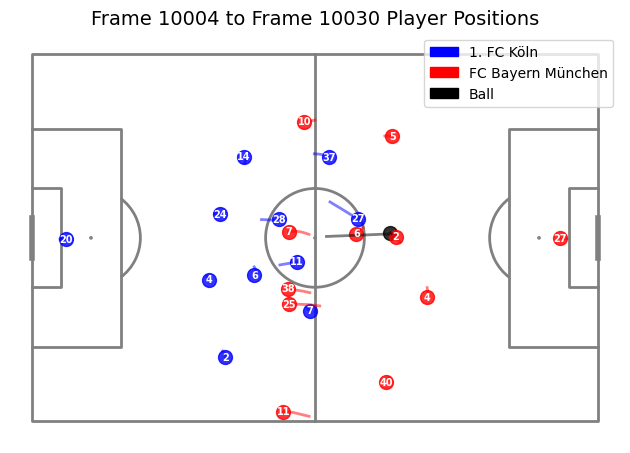

In [37]:
def plot_window_frame_positions(total_df, period_id, start_frame_idx, end_frame_idx, pitch, home_team_info, away_team_info):
    """
    Plots all x/y positions for a single frame and annotates each player with their jersey number.
    The legend shows team names.
    
    Parameters:
        df (DataFrame): Positional data (Pandas or Polars converted to Pandas if needed)
        frame_idx (int): The target frame index.
        pitch: An mplsoccer Pitch object.
        home_team_info: Team object for the home team.
        away_team_info: Team object for the away team.
    """
    # 기본 팀 색상
    team_colors = {"Home": "blue", "Away": "red", "Ball": "black"}

    window_df = total_df[(total_df['period_id'] == period_id) &
                  (total_df['frame_id'] >= start_frame_idx) &
                  (total_df['frame_id'] <= end_frame_idx)
                ]
    window_df.sort_values("frame_id", inplace=True)
    if window_df.empty:
        print("No frames found for the specified time window.")
        return
    
    # x/y 컬럼 검출 (컬럼 이름은 "pid_x" 또는 "pid_y" 형태)
    player_ids = window_df['id'].unique()
    
    # 팀 정보 딕셔너리 생성: key=player_id, value=[player.name, player.jersey_no]
    home_team_dict = {player.player_id: [player.name, player.jersey_no] for player in home_team_info.players}
    away_team_dict = {player.player_id: [player.name, player.jersey_no] for player in away_team_info.players}
    
    # 피치 그리기
    fig, ax = pitch.draw()
    ax.set_title(f"Frame {start_frame_idx} to Frame {end_frame_idx} Player Positions", fontsize=14)
        
    # 각 선수 위치 플로팅 및 등번호 표시
    for pid in player_ids:
        traj_x = window_df[window_df['id']==pid]["x"].values
        traj_y = window_df[window_df['id']==pid]["y"].values
        # if pd.isna(traj_x) or pd.isna(traj_y):
        #     continue  # 결측치 스킵
        
        if pid in home_team_dict:
            color = team_colors["Home"]
            jersey_no = home_team_dict[pid][1]
        elif pid in away_team_dict:
            color = team_colors["Away"]
            jersey_no = away_team_dict[pid][1]
        elif "ball" in pid.lower():
            color = team_colors["Ball"]
            jersey_no = ""  # 공은 등번호가 없으므로 빈 문자열
        else:
            color = "gray"
            jersey_no = ""
        
        # Plot trajectory
        ax.plot(traj_x, traj_y, color=color, linestyle='-', linewidth=2, alpha=0.5)
        
        # 마지막 프레임(window_df의 마지막 행)에서 현재 위치 표시
        current_x = traj_x[-1]
        current_y = traj_y[-1]
        # 선수 위치 scatter plot
        ax.scatter(current_x, current_y, color=color, s=100, alpha=0.8)
        # 선수 등번호 텍스트 추가 (중앙 정렬, 흰색 텍스트)
        if jersey_no != "":
            ax.text(current_x, current_y, str(jersey_no), fontsize=7, fontweight="bold", color="white",
                    ha="center", va="center")
    
    # 범례 생성: 홈팀, 어웨이팀, 볼 (필요한 경우)
    home_patch = mpatches.Patch(color=team_colors["Home"], label=home_team_info.name)
    away_patch = mpatches.Patch(color=team_colors["Away"], label=away_team_info.name)
    ball_patch = mpatches.Patch(color=team_colors["Ball"], label="Ball")
    ax.legend(handles=[home_patch, away_patch, ball_patch], loc='upper right')
    
    plt.show()

# Set up pitch using kloppy_dataset metadata (예시)
pitch = Pitch(
    pitch_type='secondspectrum', 
    pitch_length=kloppy_dataset.metadata.pitch_dimensions.pitch_length,
    pitch_width=kloppy_dataset.metadata.pitch_dimensions.pitch_width,
    pitch_color='white', 
    line_color='gray'
)

# 호출 예시 (home_team와 away_team 객체가 미리 정의되어 있다고 가정)
dataset_df = dataset.data.to_pandas()
plot_window_frame_positions(dataset_df, period_id=1,start_frame_idx = 10004, end_frame_idx=10030, pitch=pitch, home_team_info=home_team, away_team_info=away_team)

In [224]:
from unravel.soccer.dataset.kloppy_polars import (
    KloppyPolarsDataset,
    MetricPitchDimensions,
    Group,
    Column,
    Constant,
)

from unravel.soccer import PressingIntensity

import polars as pl
model = PressingIntensity(dataset=dataset)

#     start_time=pl.duration(minutes=1, seconds=53),
#     end_time=pl.duration(minutes=2, seconds=32),
#     period_id=1,
#     method="teams",
#     ball_method="max",
#     orient="home_away",
#     speed_threshold=2.0,
# )
model.fit(
    start_time=pl.duration(minutes=0, seconds=0),
    end_time=pl.duration(minutes=8, seconds=58),
    period_id=1,
    method="teams",
    ball_method="max",
    orient="home_away",
    speed_threshold=2.0,
)
model.output.head()

game_id,period_id,frame_id,timestamp,time_to_intercept,probability_to_intercept,columns,rows
str,i64,i64,duration[μs],list[list[f64]],list[list[f64]],list[str],list[str]
"""DFL-MAT-J03WMX""",1,10000,0µs,"[[3.657196, 2.346966, … 3.358121], [3.028421, 2.267262, … 2.890712], … [3.101143, 3.160652, … 2.77788]]","[[0.0, 0.0, … 0.0], [0.0, 0.0, … 0.0], … [0.0, 0.0, … 0.0]]","[""DFL-OBJ-0000IA"", ""DFL-OBJ-0002AU"", … ""DFL-OBJ-J01B8N""]","[""DFL-OBJ-00012X"", ""DFL-OBJ-000270"", … ""DFL-OBJ-J01D1W""]"
"""DFL-MAT-J03WMX""",1,10001,40ms,"[[3.876761, 2.367641, … 3.434202], [3.426185, 2.316587, … 3.060609], … [3.198366, 3.175526, … 2.78542]]","[[0.0, 0.0, … 0.0], [0.000425, 0.0, … 0.0], … [0.0, 0.0, … 0.0]]","[""DFL-OBJ-0000IA"", ""DFL-OBJ-0002AU"", … ""DFL-OBJ-J01B8N""]","[""DFL-OBJ-00012X"", ""DFL-OBJ-000270"", … ""DFL-OBJ-J01D1W""]"
"""DFL-MAT-J03WMX""",1,10002,80ms,"[[4.096708, 2.391645, … 3.513344], [3.859587, 2.366917, … 3.248054], … [3.29412, 3.192233, … 2.796789]]","[[0.0, 0.0, … 0.0], [0.000074, 0.0, … 0.00087], … [0.0, 0.0, … 0.0]]","[""DFL-OBJ-0000IA"", ""DFL-OBJ-0002AU"", … ""DFL-OBJ-J01B8N""]","[""DFL-OBJ-00012X"", ""DFL-OBJ-000270"", … ""DFL-OBJ-J01D1W""]"
"""DFL-MAT-J03WMX""",1,10003,120ms,"[[4.32539, 2.415248, … 3.5936], [4.333319, 2.417628, … 3.451917], … [3.395367, 3.208899, … 2.807655]]","[[0.0, 0.0, … 0.0], [0.000011, 0.0, … 0.000383], … [0.0, 0.0, … 0.0]]","[""DFL-OBJ-0000IA"", ""DFL-OBJ-0002AU"", … ""DFL-OBJ-J01B8N""]","[""DFL-OBJ-00012X"", ""DFL-OBJ-000270"", … ""DFL-OBJ-J01D1W""]"
"""DFL-MAT-J03WMX""",1,10004,160ms,"[[4.531222, 2.397129, … 3.70495], [4.809753, 2.464476, … 3.753357], … [3.479357, 3.186516, … 2.829727]]","[[0.0, 0.0, … 0.0], [0.000002, 0.0, … 0.000114], … [0.0, 0.0, … 0.0]]","[""DFL-OBJ-0000IA"", ""DFL-OBJ-0002AU"", … ""DFL-OBJ-J01B8N""]","[""DFL-OBJ-00012X"", ""DFL-OBJ-000270"", … ""DFL-OBJ-J01D1W""]"


In [38]:
from pressing_intensity import CustomPressingIntensity
model = CustomPressingIntensity(dataset=dataset)
# model.fit(
#     method="teams",
#     ball_method="max",
#     orient="home_away",
#     speed_threshold=2.0,
# )


# Visualization

In [2]:
import pickle
from preprocess_dfl import print_match_info

# data_path = "/data/MHL/dfl-spoho/processed"
data_path = "/data/MHL/bepro/processed"
# match_id = os.listdir(data_path)[0]
match_id = "153379"

with open(f"{data_path}/{match_id}/{match_id}_processed_dict.pkl", "rb") as f:
    match_dict = pickle.load(f)

if "dfl" in data_path:
    tracking_df = match_dict['tracking_df']
    teams = match_dict['teams']
    match_path = f"{os.path.dirname(data_path)}/raw/{match_id}"
    file_name_info = next((filename for filename in os.listdir(match_path) if "matchinformation" in filename), None)
    match_info_path = os.path.join(match_path, file_name_info)
    print(f"=== [General Match Info] : {match_id}===")
    match_info = print_match_info(match_info_path)

elif "bepro" in data_path:
    tracking_df = match_dict['tracking_df']
    teams = match_dict['teams']
    meta_data = match_dict['meta_data']

with open(f"{data_path}/{match_id}/{match_id}_presing_intensity.pkl", "rb") as f:
    press_df = pickle.load(f)


In [3]:
class Player:
    def __init__(self, name, number, player_id, team_name, is_gk, is_home):
        self.name = name
        self.number = number
        self.player_id = player_id
        self.team_name = team_name
        self.is_gk = is_gk
        self.is_home = is_home
        

    def __repr__(self):
        # 객체를 문자열로 표현할 때 사용됩니다.
        return (f"Player name={self.name}, number={self.number}, "
                f"player_id={self.player_id}, is_gk={self.is_gk}, "
                f"is_home={self.is_home})")

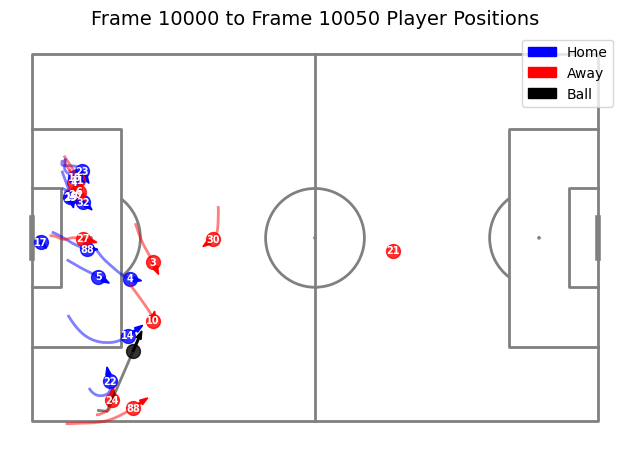

In [5]:
from visualization import plot_window_frame_positions

plot_window_frame_positions(tracking_df, period_id=1, start_frame_idx=10000, end_frame_idx = 10050, home_team_info=teams['Home'], away_team_info=teams['Away'])

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

from mplsoccer import VerticalPitch
from matplotlib.animation import FuncAnimation

import seaborn as sns
import numpy as np
import pandas as pd

HOME_COLOR, HOME_GK_COLOR = "red", "grey"
AWAY_COLOR, AWAY_GK_COLOR = "orange", "green"
BALL_COLOR = "blue"


def __plot_settings(ax, row_players, column_players, method = 'teams', speed_threshold: float = None):
    for t in ax.texts:
        t.set_text(t.get_text() + " %")
    ax.figure.axes[-1].yaxis.label.set_size(10)

    ax.tick_params(
        axis="both",
        which="major",
        labelsize=10,
        labelbottom=False,
        bottom=False,
        top=False,
        labeltop=True,
    )

    ax.tick_params(length=0)
    ax.xaxis.set_label_position("top")

    row_colors = [
        (
            (
                HOME_COLOR
                if player.is_home and not player.is_gk
                else (
                    HOME_GK_COLOR
                    if player.is_home
                    else AWAY_COLOR if not player.is_gk else AWAY_GK_COLOR
                )
            )
            if player is not None
            else BALL_COLOR
        )
        for player in row_players
    ]
    column_colors = [
        (
            (
                HOME_COLOR
                if player.is_home and not player.is_gk
                else (
                    HOME_GK_COLOR
                    if player.is_home
                    else AWAY_COLOR if not player.is_gk else AWAY_GK_COLOR
                )
            )
            if player is not None
            else BALL_COLOR
        )
        for player in column_players
    ]

    [t.set_color(color) for t, color in zip(ax.xaxis.get_ticklabels(), column_colors)]
    [t.set_color(color) for t, color in zip(ax.yaxis.get_ticklabels(), row_colors)]

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=45)

    fontsize = 15
    # if model._method == "teams":
    if method == "teams":
        ax.set_ylabel(row_players[0].team_name, fontsize=fontsize)
        ax.set_xlabel(column_players[0].team_name, fontsize=fontsize)
    else:
        ax.set_ylabel("", fontsize=fontsize)
        ax.set_xlabel("", fontsize=fontsize)

    for t in ax.texts:
        t.set_text(t.get_text())
    if speed_threshold is not None:
        ax.set_title(f"Active Pressing [v > {speed_threshold}m/s]", fontsize=14)


def __plot_dots(frame_data, total_players, ax):
    import matplotlib.patheffects as path_effects

    # Because we use VerticalPitch we flip x and y

    for r in frame_data.iter_rows(named=True):
        v, vy, vx, y, x = r["v"], r["vx"], r["vy"], r["x"], r["y"]
        is_ball = True if r["team_id"] == "ball" else False

        if not is_ball:
            # player = dataset.get_player_by_id(player_id=r["id"])
            player = [p for p in total_players if p.player_id == r['id']][0]

            color = (
                HOME_COLOR
                if player.is_home and not player.is_gk
                else (
                    HOME_GK_COLOR
                    if player.is_home
                    else AWAY_COLOR if not player.is_gk else AWAY_GK_COLOR
                )
            )
            ax.scatter(x, y, color=color, s=150)

            if v > 1.0:
                ax.annotate(
                    "",
                    xy=(x + vx, y + vy),
                    xytext=(x, y),
                    arrowprops=dict(arrowstyle="->", color=color, lw=3),
                )
            # # Text with white border
            text = ax.text(
                x,
                y,
                player.number,
                color="black",
                fontsize=8,
                ha="center",
                va="center",
                zorder=5,
            )
            text.set_path_effects(
                [
                    path_effects.Stroke(
                        linewidth=2, foreground="white"
                    ),  # White border
                    path_effects.Normal(),  # Restore normal text appearance
                ]
            )
        else:
            ax.scatter(x, y, color=BALL_COLOR, s=50, zorder=10)


def __plot_matrix(
    matrix, row_players, column_players, ax, speed_threshold: float = None
):

    df = pd.DataFrame(
        data=matrix,
        index=[p.number if p is not None else "ball" for p in row_players],
        columns=[p.number if p is not None else "ball" for p in column_players],
    )
    sns.heatmap(
        df * 100,
        xticklabels=True,
        yticklabels=True,
        cmap="hot_r",
        ax=ax,
        vmin=0,
        vmax=100,
        annot=True,
        fmt=".0f",
        square=True,
        linewidths=0.5,
        cbar=False,
    )
    __plot_settings(ax, row_players, column_players, 'teams', speed_threshold)
    return ax

In [5]:
import polars as pl
import config as C

def plot_pressing_intensity(row, ax1, ax2):
    period_id = row["period_id"]
    frame_id = row["frame_id"]

    # row_players = [dataset.get_player_by_id(player_id) for player_id in row["rows"]]
    # column_players = [
    #     dataset.get_player_by_id(player_id) for player_id in row["columns"]
    # ]

    # frame_data = model.dataset.filter(
    #     (pl.col("frame_id") == frame_id) & (pl.col("period_id") == period_id)
    # )
    players_df = pd.concat([teams['Home'], teams['Away']]).set_index(['pID'])
    players_df['is_home'] = players_df['team'].apply(lambda x: True if x == 'Home' else False)
    players_df['is_gk'] = players_df['position'].apply(lambda x: True if x == 'GK' else False)

    row_players = []
    column_players = []

    for row_pid in row['rows']:
        player = players_df.loc[row_pid]
        if player['is_home']:
            team_name = meta_data['home_team']['team_name']
            # team_name = match_info['HomeTeamName']
        else:
            team_name = meta_data['away_team']['team_name']
            # team_name = match_info['GuestTeamName']
        team_name = C.TEAM_NAME[team_name]
        row_players.append(Player(
                            name=player['player'],
                            number=player['jID'],
                            player_id=player.name,
                            team_name=team_name,
                            is_gk=player['is_gk'],
                            is_home=player['is_home']
                                ))
                
    for column_pid in row['columns']:
        player = players_df.loc[column_pid]
        if player['is_home']:
            team_name = meta_data['home_team']['team_name']
            # team_name = match_info['HomeTeamName']
        else:
            team_name = meta_data['away_team']['team_name']
            # team_name = match_info['GuestTeamName']
        team_name = C.TEAM_NAME[team_name]
        column_players.append(Player(
                            name=player['player'],
                            number=player['jID'],
                            player_id=player.name,
                            team_name=team_name,
                            is_gk=player['is_gk'],
                            is_home=player['is_home']
                                ))
    total_players = row_players + column_players
    polars_df = pl.from_pandas(tracking_df)
    frame_data = polars_df.filter(
        (pl.col("frame_id") == frame_id) & (pl.col("period_id") == period_id)
    )
    
    __plot_dots(frame_data=frame_data, total_players=total_players, ax=ax1)
    __plot_matrix(
        matrix=np.array([x for x in row["probability_to_intercept"]]),
        row_players=row_players,
        column_players=column_players,
        # speed_threshold=model._speed_threshold,
        speed_threshold=None,
        ax=ax2,
    )

In [11]:
frame_id

4458

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

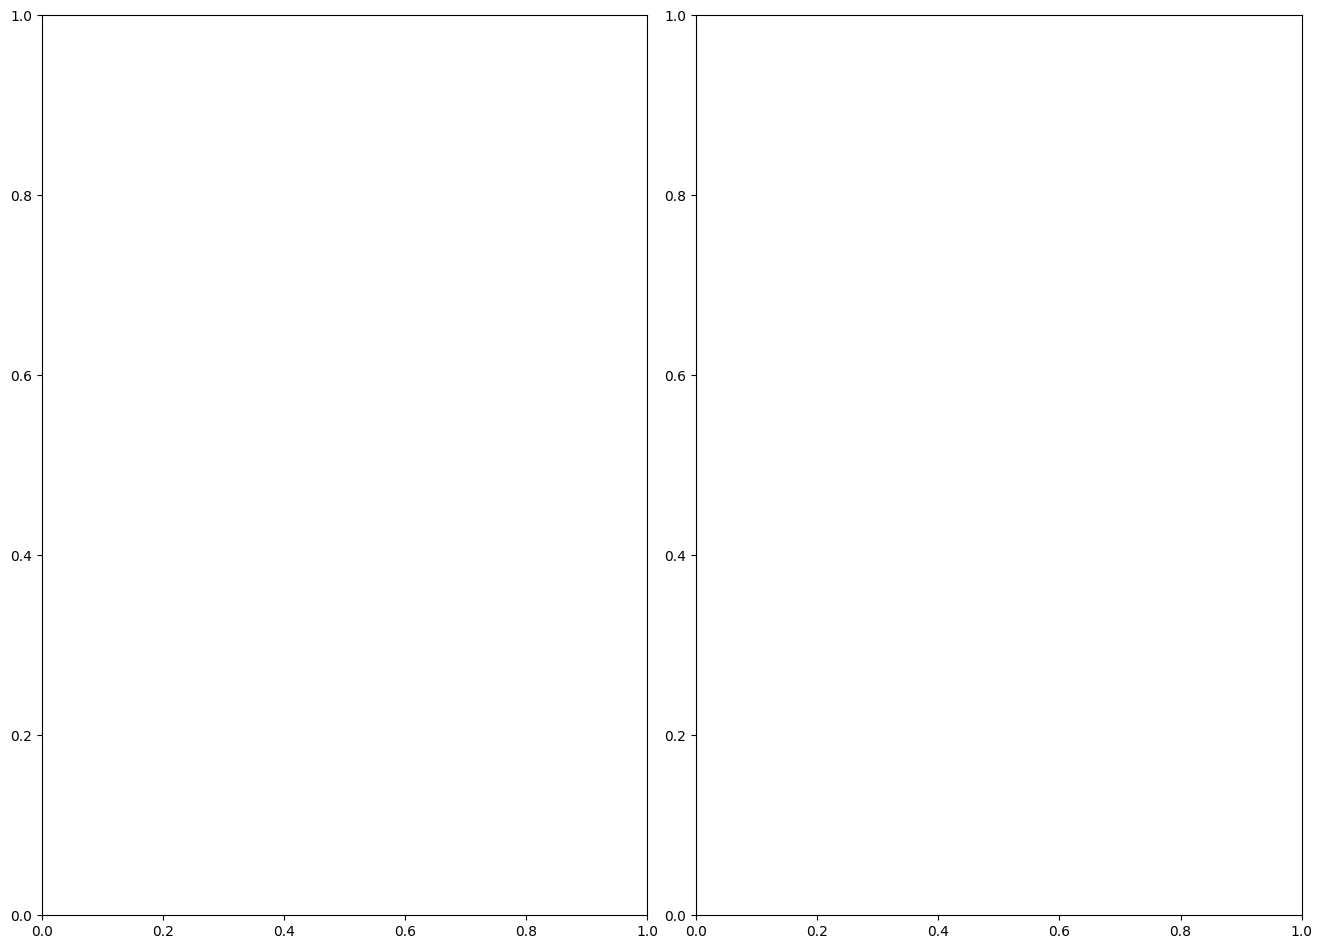

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 10), gridspec_kw={"wspace": 0.08})
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

row  = window_df[window_df['frame_id'] == frame_id]
plot_pressing_intensity(row, ax1, ax2)

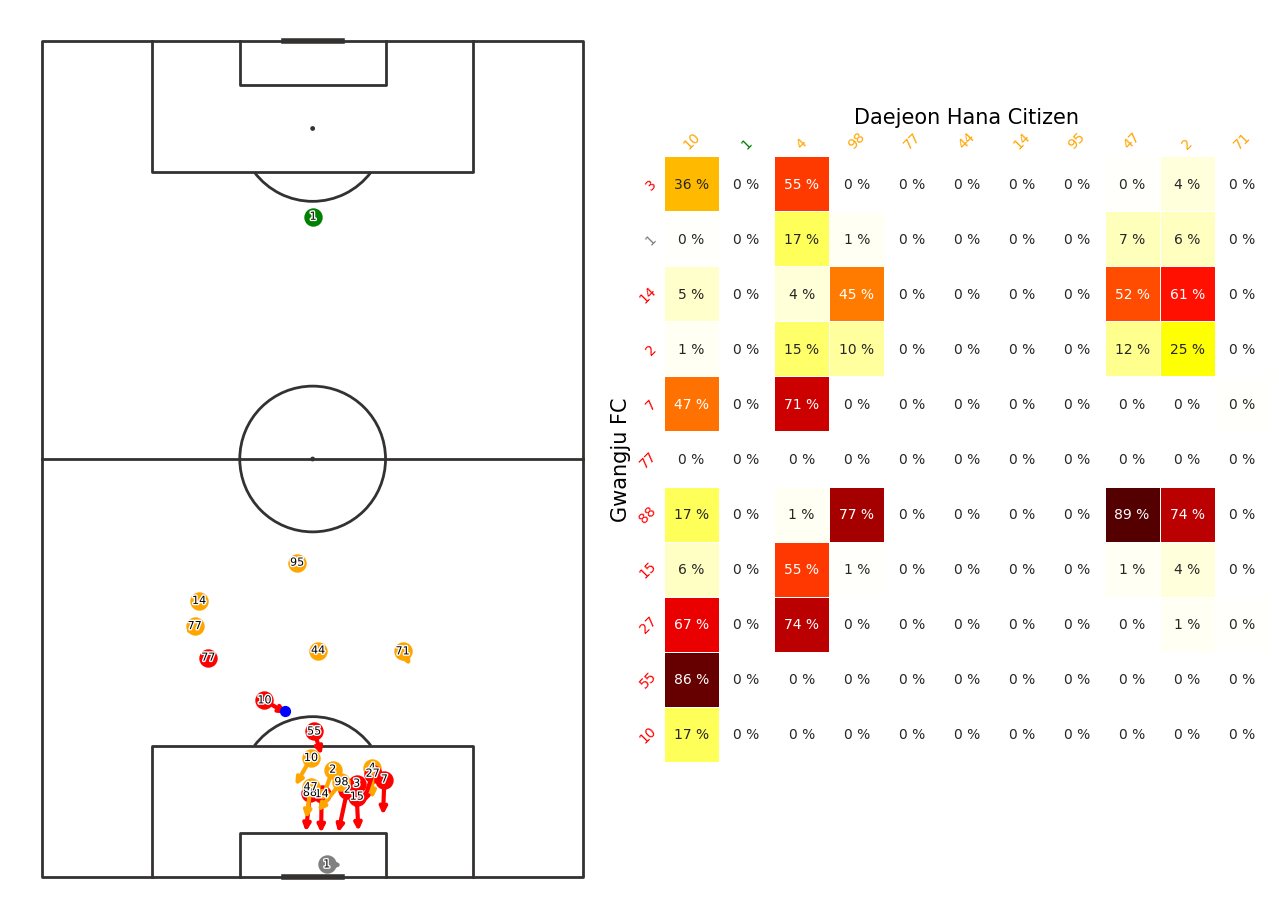

In [7]:
period_id, frame_id = 1, 4458

FILE_PATH = f"../figs/{meta_data['match_title']}_{frame_id}2.mp4"
# FILE_PATH = f"../figs/{match_info['MatchTitle']}_{frame_id}.mp4"

pitch = VerticalPitch(
    pitch_type=coordinates,
    pitch_length=C.PITCH_X_MAX - C.PITCH_X_MIN,
    pitch_width=C.PITCH_Y_MAX - C.PITCH_Y_MIN,
    pitch_color="white",
    line_color="#343131",
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 10), gridspec_kw={"wspace": 0.08})
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

window_df = press_df[
        (press_df['period_id']==period_id) &
        (press_df['frame_id']>=frame_id - 10) &
        (press_df['frame_id']<=frame_id + 10)
        ]

def update(idx):
    ax1.clear()
    ax2.clear()

    pitch.draw(ax=ax1)
    # row = model.output.to_pandas().iloc[idx]
    row = window_df.iloc[idx]
    plot_pressing_intensity(row, ax1, ax2)


# ani = FuncAnimation(fig, update, frames=len(model.output), repeat=False)
ani = FuncAnimation(fig, update, frames=len(window_df['frame_id'].unique()), repeat=False)

ani.save(
    # FILE_PATH, fps=kloppy_dataset.metadata.frame_rate, extra_args=["-vcodec", "libx264"]
    FILE_PATH, fps=meta_data['fps'], extra_args=["-vcodec", "libx264"]
)